# **🧠 Project: Fake News Detector using NLP & ML**

**Import Libraries and Load Data**

In [18]:
import pandas as pd

# Load the fake and real datasets
fake_df = pd.read_csv("/content/sample_data/Fake.csv")
real_df = pd.read_csv("/content/sample_data/True.csv")

# Add labels: 0 for fake, 1 for real
fake_df["label"] = 0
real_df["label"] = 1

# Combine the data
data = pd.concat([fake_df, real_df], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle data

# Show first 5 rows
data.head()


,title,text,subject,date,label
0,Florida LGBT rights push reflects changing times,"TALLAHASSEE, Fla. (Reuters) - A Republican, a ...",politicsNews,"May 2, 2017",1
1,SHERIFF CLARKE CALLS OUT NFL For Latest Move T...,Sheriff Clarke has it right! The NFL wasn t li...,politics,"Oct 14, 2017",0
2,Lying Liar Behind ‘Baby Parts’ Videos Rejects...,"David Daleidan, the ringleader for the decepti...",News,"February 5, 2016",0
3,Senators introduce bill to block expansion of ...,WASHINGTON (Reuters) - A small group of bipart...,politicsNews,"May 19, 2016",1
4,China urges North Korea to 'stop taking action...,UNITED NATIONS (Reuters) - China s U.N Ambassa...,worldnews,"September 4, 2017",1


# **Text Cleaning using NLP**

**Cleaning:**

**🔹 Step 4.1: Import Libraries & Download Stopwords**

In [19]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**✅ Step 4.2: View a few stopwords (optional – just to understand)**

In [20]:
stopwords.words('english')[:10]  # Print first 10 stopwords


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

**✅ Step 4.3: Combine title and text columns**

In [21]:
data['text'] = data['title'] + " " + data['text']


**✅ Step 4.4: Define a function to clean the text**

In [23]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    cleaned = [word for word in words if word not in stop_words]
    return ' '.join(cleaned)


**✅ Step 4.5: Apply cleaning function to all rows**

In [24]:
data['text'] = data['text'].apply(clean_text)


**✅ Step 4.6: Preview cleaned data**

In [25]:
data[['text', 'label']].head()


,text,label
0,florida lgbt rights push reflects changing tim...,1
1,sheriff clarke calls nfl latest move ‘kicks sa...,0
2,lying liar behind ‘baby parts’ videos rejects ...,0
3,senators introduce bill block expansion fbi ha...,1
4,china urges north korea stop taking actions wr...,1


**Step 5: Feature Extraction using TF-IDF Vectorizer**

**✅ Step 5.1: Import TfidfVectorizer**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer


**✅ Step 5.2: Initialize the TF-IDF Vectorize**

In [27]:
vectorizer = TfidfVectorizer(max_features=5000)


**✅ Step 5.3: Fit and transform the text data**

In [28]:
X = vectorizer.fit_transform(data['text']).toarray()


**✅ Step 5.4: Get target labels (y)**

In [29]:
y = data['label']


**✅ Step 6: Train/Test Split and Model Training**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Predict
y_pred = model.predict(X_test)


In [34]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.988641425389755

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4783
           1       0.98      0.99      0.99      4197

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



# **check data is proper clean or not**

In [35]:
import string
data['text'].apply(lambda x: any(char in string.punctuation for char in x)).sum()


np.int64(0)

In [36]:
# stopwords remove
data['text'].iloc[0]


'florida lgbt rights push reflects changing times tallahassee fla reuters republican democrat lobbyist leading businesses florida huddled spring state capitol mapping next move campaign enact first statewide lgbt antidiscrimination law us south record number republican lawmakers thrown support behind proposed protections lesbian gay bisexual transgender people hundreds companies backed cause bill far fallen short time running legislative session lead backers heartened progress determined retool next year “we definitely need ramp grassroots” said joseph salzverg lobbyist florida competes group 450 state businesses supporting lgbt protections “there’s lot republicans agree policy worried effect back home” year transgender bathroom access erupted us culture wars flashpoint florida among conservative statehouses lgbt activists see momentum building affirmative legislation nation’s third mostpopulous state florida could offer next breakthrough national movement advance lgbt civilrights prot

In [37]:
# blank rows ya NaN check:
data.isnull().sum()


,0
title,0
text,0
subject,0
date,0
label,0


In [38]:
# Final Check (text length > 0):
(data['text'].apply(len) == 0).sum()


np.int64(0)

# **Final Model Check**

In [39]:
for i in range(5):
    print("Text:", data['text'].iloc[i][:300], '...')
    print("Actual Label:", y.iloc[i])
    print("Predicted Label:", model.predict([X[i]])[0])
    print("-----------")


Text: florida lgbt rights push reflects changing times tallahassee fla reuters republican democrat lobbyist leading businesses florida huddled spring state capitol mapping next move campaign enact first statewide lgbt antidiscrimination law us south record number republican lawmakers thrown support behind ...
Actual Label: 1
Predicted Label: 1
-----------
Text: sheriff clarke calls nfl latest move ‘kicks sand face fans’ video sheriff clarke right nfl listening fans year ago still listening league sinks lower lower ratings powersthatbe doubled said plans mandate players stand anthem clarke says latest announcement kicks sand face fans say right sheriffclark ...
Actual Label: 0
Predicted Label: 0
-----------
Text: lying liar behind ‘baby parts’ videos rejects plea deal demands apology video david daleidan ringleader deceptively named center medical progress foolishly rejecting plea deal indicted texas grand jury illegal activities took part create infamous baby parts videos used attempt 

**with Confusion Matrix**

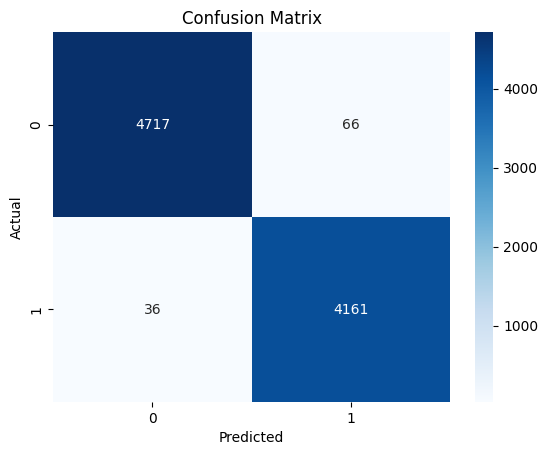

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.988641425389755


**Save the Trained Model (using joblib)**

In [42]:
import joblib


In [43]:
# Save model
joblib.dump(model, 'fake_news_model.joblib')

# Save TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [44]:
from google.colab import files

files.download('fake_news_model.joblib')
files.download('tfidf_vectorizer.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>